# Facial Expression Recognition

Nguyễn Hữu Phong - BIT240181 - Leader

Triệu Hồng Quân - BIT240188

Trần Hoàng Hải - BIT240084

---

#### FILE 2: PART 3.2 - PART 3.3

---
# PART 3.2: Architecture Analysis Questions (2 marks)
---

## Question 3.2.a) MaxPooling Layer Analysis (Purpose and Spatial Dimension Changes)

### Purpose of MaxPooling Layer:

**MaxPooling** là một lớp giảm chiều (downsampling layer) trong mạng neural tích chập với các mục đích chính:

1. **Giảm kích thước không gian (Spatial Dimension Reduction)**:
   - Giảm số lượng tham số và khối lượng tính toán trong mạng
   - Giúp kiểm soát overfitting bằng cách cung cấp một dạng trừu tượng hóa

2. **Trích xuất đặc trưng nổi bật (Feature Extraction)**:
   - Chọn giá trị lớn nhất trong mỗi vùng, giữ lại các đặc trưng quan trọng nhất
   - Loại bỏ các thông tin ít quan trọng, giữ lại các activation mạnh nhất

3. **Tạo tính bất biến vị trí (Translation Invariance)**:
   - Giúp mô hình nhận dạng đối tượng bất kể vị trí chính xác trong ảnh
   - Các đặc trưng được nhận dạng dù có dịch chuyển nhỏ

4. **Mở rộng receptive field**:
   - Cho phép các lớp sau "nhìn" được vùng lớn hơn của ảnh đầu vào

### Phân tích thay đổi kích thước khi thay đổi MaxPooling:

**Công thức tính kích thước đầu ra:**

$$\text{Output Size} = \left\lfloor \frac{W - K + 2P}{S} \right\rfloor + 1$$

Trong đó:
- W = Kích thước đầu vào (Width/Height)
- K = Kích thước kernel
- P = Padding (mặc định = 0 cho MaxPooling)
- S = Stride

**Tại vị trí MaxPool đầu tiên (a), kích thước đầu vào là 112×112×32**

#### Trường hợp 1: MaxPool 2×2 với stride=2 (Original)
$$\text{Output} = \left\lfloor \frac{112 - 2 + 0}{2} \right\rfloor + 1 = \left\lfloor \frac{110}{2} \right\rfloor + 1 = 55 + 1 = 56$$
**Kích thước đầu ra: 56×56×32**

#### Trường hợp 2: MaxPool 3×3 với stride=2 (Modified)
$$\text{Output} = \left\lfloor \frac{112 - 3 + 0}{2} \right\rfloor + 1 = \left\lfloor \frac{109}{2} \right\rfloor + 1 = 54 + 1 = 55$$
**Kích thước đầu ra: 55×55×32**

### So sánh hai trường hợp:

| Đặc điểm | MaxPool 2×2 (s=2) | MaxPool 3×3 (s=2) |
|----------|-------------------|-------------------|
| Kích thước đầu ra | 56×56×32 | 55×55×32 |
| Tổng số pixels | 3,136 | 3,025 |
| Giảm so với đầu vào | 75% | ~75.9% |
| Vùng receptive field | 2×2 = 4 pixels | 3×3 = 9 pixels |
| Thông tin bị mất | Ít hơn | Nhiều hơn |

### Tác động của thay đổi:

1. **Kích thước giảm 1 pixel mỗi chiều**: Từ 56×56 xuống 55×55
2. **Receptive field lớn hơn**: Mỗi giá trị đầu ra đại diện cho vùng 3×3 thay vì 2×2
3. **Mất nhiều thông tin chi tiết hơn**: Kernel lớn hơn có thể bỏ qua các đặc trưng nhỏ
4. **Tăng tính bất biến**: Nhưng có thể làm giảm độ chính xác của vị trí đặc trưng

**Lưu ý**: Hình vẽ ghi 56×56×24 sau MaxPool là **SAI**. Kích thước đúng phải là 56×56×32 vì MaxPooling không thay đổi số kênh (channels).

## Question 3.2.b) Skip Connection Analysis (Component b)

### Xác định loại kết nối:

**Component (b) trong hình là "Skip Connection" (Residual Connection / Shortcut Connection)**

Trong kiến trúc được cho, có **hai skip connections** xuất phát từ sau lớp MaxPool đầu tiên:
- **Skip 1 (bên trái)**: Kết nối từ sau MaxPool1 đến sau Conv layer thứ 4 (sau 2 lớp Conv 5×5)
- **Skip 2 (component b, bên phải)**: Kết nối từ sau MaxPool1 đến sau Conv layer thứ 6 (sau 2 lớp Conv 3×3 tiếp theo)

### Cách thức hoạt động:

```
                    ┌─────────────────────────────────────────────────────────┐
                    │                                                         │ Skip 2 (b)
                    │    ┌─────────────────────────────┐                      │
                    │    │                             │ Skip 1               │
                    │    │                             │                      │
Input ─► MaxPool ──►├────┼─► Conv5x5 ─► Conv5x5 ──(+)──┼─► Conv3x3 ─► Conv3x3 ──(+)──► ...
                         │                             │                      │
                         └─────────────────────────────┘                      │
                                                                              │
                         └────────────────────────────────────────────────────┘
```

**Công thức toán học:**

Thay vì chỉ học ánh xạ $H(x)$, mạng học hàm residual $F(x)$:

$$y = F(x) + x$$

Trong đó:
- $x$: Đầu vào của skip connection
- $F(x)$: Hàm được học bởi các lớp tích chập
- $y$: Đầu ra sau khi cộng

Nếu kích thước/số kênh khác nhau, cần projection:
$$y = F(x) + W_s \cdot x$$

Với $W_s$ là phép biến đổi 1×1 convolution để khớp kích thước.

### Lợi ích của Skip Connections:

1. **Giải quyết vấn đề Vanishing Gradient**:
   - Gradient có thể truyền trực tiếp qua skip connection
   - Ngăn gradient trở nên quá nhỏ khi truyền ngược qua nhiều lớp
   - Cho phép huấn luyện mạng sâu hơn (100+ layers)

2. **Học Residual dễ hơn**:
   - Thay vì học toàn bộ ánh xạ, chỉ cần học "phần bổ sung"
   - Nếu identity mapping là tối ưu, F(x) chỉ cần học = 0
   - Dễ tối ưu hóa hơn

3. **Cải thiện tốc độ hội tụ**:
   - Huấn luyện nhanh hơn do gradient flow tốt hơn
   - Giảm số epoch cần thiết

4. **Tăng cường biểu diễn đặc trưng**:
   - Kết hợp đặc trưng ở nhiều mức độ trừu tượng
   - Low-level features (edges) được preserve và kết hợp với high-level features

5. **Ngăn ngừa Degradation Problem**:
   - Mạng sâu không bị giảm hiệu năng so với mạng nông
   - Đảm bảo ít nhất đạt được performance của identity mapping

### Đặc điểm trong kiến trúc này:

Kiến trúc sử dụng **Dual Skip Connections**:
- Skip 1 ngắn: Bảo tồn thông tin sau 2 lớp Conv
- Skip 2 dài (b): Bảo tồn thông tin sau 4 lớp Conv

Điều này tạo ra:
- **Multi-scale feature fusion**: Kết hợp đặc trưng ở nhiều độ sâu
- **Dense gradient pathways**: Nhiều đường để gradient truyền ngược
- **Richer feature representations**: Biểu diễn phong phú hơn

## Question 3.2.c) Global Max Pooling (GMP) Definition and Proposed Placement

### Định nghĩa Global Max Pooling (GMP):

**Global Max Pooling (GMP)** là một kỹ thuật pooling lấy giá trị **lớn nhất** từ **toàn bộ feature map** cho mỗi channel.

**Công thức toán học:**
$$\text{GMP}(X_c) = \max_{i,j} X_c(i, j)$$

Trong đó:
- $X_c$: Feature map của channel thứ c
- $i, j$: Vị trí không gian trong feature map
- Kết quả: 1 giá trị scalar cho mỗi channel

**Ví dụ:**
- Đầu vào: 14×14×112 (feature map)
- Sau GMP: 1×1×112 → có thể reshape thành vector 112 chiều

### So sánh các loại Pooling:

| Loại | Công thức | Đầu ra |
|------|-----------|--------|
| Max Pooling (local) | max trong vùng K×K | Giảm H, W theo stride |
| Global Max Pooling | max toàn bộ H×W | 1×1×C |
| Global Average Pooling | mean toàn bộ H×W | 1×1×C |

### Ưu điểm của GMP:

1. **Giảm đáng kể số tham số**:
   - Không cần Flatten layer tạo ra vector khổng lồ
   - Ví dụ: 14×14×112 = 21,952 → 112

2. **Chống overfitting**:
   - Ít tham số hơn = ít khả năng overfit

3. **Tính bất biến vị trí cao**:
   - Đặc trưng quan trọng nhất được giữ lại bất kể vị trí

4. **Interpretability**:
   - Mỗi kênh đại diện cho một đặc trưng cụ thể

### Vị trí đề xuất cho GMP:

**Đề xuất**: Chèn GMP **thay thế Flatten layer** hoặc **sau MaxPool cuối cùng, trước Flatten**.

**Lý do:**
1. Tại vị trí này (sau Conv cuối), feature maps đã chứa các đặc trưng high-level
2. GMP sẽ giảm kích thước từ 7×7×112 = 5,488 xuống còn 112
3. Giảm số tham số của Dense layer đầu tiên đáng kể
4. Phù hợp với các mạng hiện đại như ResNet, Inception

### Sơ đồ mạng sau khi thêm GMP:

```
                                        INPUT
                                    (224×224×3)
                                         │
                                         ▼
                              ┌─────────────────────┐
                              │   Conv 3×3 (s=2)    │
                              │    + BN + ReLU      │
                              └─────────────────────┘
                                    112×112×32
                                         │
                                         ▼
                              ┌─────────────────────┐
                              │   Conv 3×3 (s=1)    │
                              │    + BN + ReLU      │
                              └─────────────────────┘
                                    112×112×32
                                         │
                                         ▼
                              ┌─────────────────────┐
                              │  MaxPool 2×2 (s=2)  │ ◄── Component (a)
                              └─────────────────────┘
                                     56×56×32
                                         │
           ┌─────────────────────────────┼─────────────────────────────┐
           │                             │                             │
      Skip 1                        Main Path                     Skip 2 (b)
           │                             │                             │
           │                             ▼                             │
           │                  ┌─────────────────────┐                  │
           │                  │   Conv 5×5 (s=1)    │                  │
           │                  │    + BN + ReLU      │                  │
           │                  └─────────────────────┘                  │
           │                         56×56×40                          │
           │                             │                             │
           │                             ▼                             │
           │                  ┌─────────────────────┐                  │
           │                  │   Conv 5×5 (s=1)    │                  │
           │                  │    + BN + ReLU      │                  │
           │                  └─────────────────────┘                  │
           │                         56×56×40                          │
           │                             │                             │
           └──────────► (+) ◄────────────┘                             │
                         │                                             │
                         ▼                                             │
              ┌─────────────────────┐                                  │
              │   Conv 3×3 (s=1)    │                                  │
              │    + BN + ReLU      │                                  │
              └─────────────────────┘                                  │
                     56×56×80                                          │
                         │                                             │
                         ▼                                             │
              ┌─────────────────────┐                                  │
              │   Conv 3×3 (s=1)    │                                  │
              │    + BN + ReLU      │                                  │
              └─────────────────────┘                                  │
                     56×56×80                                          │
                         │                                             │
                         └──────────────────────► (+) ◄────────────────┘
                                                  │
                                                  ▼
                                       ┌─────────────────────┐
                                       │   Conv 3×3 (s=2)    │
                                       │    + BN + ReLU      │
                                       └─────────────────────┘
                                             28×28×112
                                                  │
                                                  ▼
                                       ┌─────────────────────┐
                                       │   Conv 3×3 (s=2)    │
                                       │    + BN + ReLU      │
                                       └─────────────────────┘
                                             14×14×112
                                                  │
                                                  ▼
                                       ┌─────────────────────┐
                                       │  MaxPool 2×2 (s=2)  │
                                       └─────────────────────┘
                                              7×7×112
                                                  │
                                                  ▼
                                ┌───────────────────────────────┐
                                │  ★ GLOBAL MAX POOLING (GMP) ★ │  ◄── NEW LAYER
                                └───────────────────────────────┘
                                              1×1×112
                                                  │
                                                  ▼
                                       ┌─────────────────────┐
                                       │   Dense 1 (512)     │
                                       │       ReLU          │
                                       └─────────────────────┘
                                                  │
                                                  ▼
                                       ┌─────────────────────┐
                                       │   Dense 2 (128)     │
                                       │       ReLU          │
                                       └─────────────────────┘
                                                  │
                                                  ▼
                                       ┌─────────────────────┐
                                       │   Dense 3 (7)       │
                                       │     Softmax         │
                                       └─────────────────────┘
                                                  │
                                                  ▼
                                              OUTPUT
                                           (7 classes)
```

### Lưu ý về các giá trị SAI trong hình gốc:

1. **56×56×24** sau MaxPool1 → **SAI**, đúng phải là **56×56×32** (MaxPool không thay đổi channels)
2. **14×14×112** sau MaxPool2 → **SAI**, đúng phải là **7×7×112** (14/2 = 7)
3. **Dense 3, 10** → **SAI** cho bài toán này, đúng phải là **Dense 3, 7** (7 emotion classes)

---
# PART 3.3: Implementation of the Deep Learning Architecture (2 marks)
---

Triển khai kiến trúc Deep Learning theo sơ đồ đã cho, bao gồm:
- Dual Skip Connections (2 đường skip chạy song song)
- Các lớp Conv, BatchNorm, ReLU, MaxPool
- Dense layers cho classification

In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.18.0
GPU Available: []


In [2]:
# Define constants
DATA_DIR = 'Data'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')

EMOTION_LABELS = {
    1: 'Surprise',
    2: 'Fear', 
    3: 'Disgust',
    4: 'Happiness',
    5: 'Sadness',
    6: 'Anger',
    7: 'Neutral'
}

IMG_SIZE = 224
NUM_CLASSES = 7

In [3]:
def load_dataset(data_dir, img_size=224):
    """Load images from directory structure."""
    images = []
    labels = []
    
    for label in range(1, 8):
        folder_path = os.path.join(data_dir, str(label))
        
        if not os.path.exists(folder_path):
            continue
        
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        print(f"Loading {EMOTION_LABELS[label]} ({label}): {len(image_files)} images")
        
        for img_file in tqdm(image_files, desc=f"Loading {EMOTION_LABELS[label]}", leave=False):
            img_path = os.path.join(folder_path, img_file)
            
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize((img_size, img_size))
                img_array = np.array(img)
                
                images.append(img_array)
                labels.append(label - 1)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    
    return np.array(images), np.array(labels)

In [4]:
# Load data
print("Loading Training Dataset...")
X_train, y_train = load_dataset(TRAIN_DIR, IMG_SIZE)
print(f"\nTraining set shape: {X_train.shape}")

print("\nLoading Testing Dataset...")
X_test, y_test = load_dataset(TEST_DIR, IMG_SIZE)
print(f"\nTesting set shape: {X_test.shape}")

Loading Training Dataset...
Loading Surprise (1): 1290 images


Loading Fear (2): 281 images


Loading Disgust (3): 717 images


Loading Happiness (4): 4772 images


Loading Sadness (5): 1982 images


Loading Anger (6): 705 images


Loading Neutral (7): 2524 images



Training set shape: (12271, 224, 224, 3)

Loading Testing Dataset...
Loading Surprise (1): 329 images


Loading Fear (2): 74 images


Loading Disgust (3): 160 images


Loading Happiness (4): 1185 images


Loading Sadness (5): 478 images


Loading Anger (6): 162 images


Loading Neutral (7): 680 images



Testing set shape: (3068, 224, 224, 3)


In [5]:
# Memory-efficient approach: Delete raw arrays and use generators
# First normalize test data (smaller, ~3000 images)
X_test_normalized = X_test.astype('float32') / 255.0
y_test_onehot = to_categorical(y_test, num_classes=NUM_CLASSES)

# Delete test arrays to free memory
del X_test, y_test
import gc
gc.collect()

print(f"Test set shape: {X_test_normalized.shape}")

Test set shape: (3068, 224, 224, 3)


In [6]:
def conv_bn_relu(x, filters, kernel_size, strides=1, padding='same', name=None):
    """
    Convolutional block with BatchNormalization and ReLU activation.
    
    Args:
        x: Input tensor
        filters: Number of filters
        kernel_size: Size of convolution kernel
        strides: Stride for convolution
        padding: Padding type
        name: Base name for the layers
    
    Returns:
        Output tensor after Conv2D + BatchNorm + ReLU
    """
    if name:
        conv_name = f'{name}_conv'
        bn_name = f'{name}_bn'
    else:
        conv_name = None
        bn_name = None
    
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, 
                      use_bias=False, name=conv_name)(x)
    x = layers.BatchNormalization(name=bn_name)(x)
    x = layers.ReLU()(x)
    return x

In [7]:
def build_custom_architecture(input_shape=(224, 224, 3), num_classes=7, use_gmp=False):
    """
    Build the custom architecture based on the provided diagram.
    
    Architecture features:
    - Initial Conv layers with stride for downsampling
    - MaxPooling layer
    - Dual skip connections (splitting at MaxPool, merging at different points)
    - Final Conv layers and Dense layers for classification
    
    Args:
        input_shape: Shape of input images
        num_classes: Number of output classes
        use_gmp: Whether to use Global Max Pooling (Question 3.2.c modification)
    
    Returns:
        Keras Model
    """
    
    # Input
    inputs = layers.Input(shape=input_shape, name='input')
    
    # ==================== INITIAL STEM ====================
    # Conv 3x3 (s=2) + BN + ReLU → 112x112x32
    x = conv_bn_relu(inputs, filters=32, kernel_size=3, strides=2, name='stem_conv1')
    
    # Conv 3x3 (s=1) + BN + ReLU → 112x112x32
    x = conv_bn_relu(x, filters=32, kernel_size=3, strides=1, name='stem_conv2')
    
    # MaxPool 2x2 (s=2) → 56x56x32
    x = layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool1')(x)
    # Note: The diagram shows 56x56x24 which is INCORRECT. Correct is 56x56x32
    
    # ==================== DUAL SKIP CONNECTIONS ====================
    # At this point, the tensor splits into 3 paths:
    # - Skip connection 1 (left): goes directly to merge point after Conv 5x5 layers
    # - Main path (middle): goes through all Conv layers
    # - Skip connection 2 (right, component b): goes directly to merge point after Conv 3x3 layers
    
    skip1 = x  # 56x56x32 - will merge after 2x Conv 5x5
    skip2 = x  # 56x56x32 - will merge after 2x Conv 3x3 (component b)
    
    # ==================== FIRST CONV BLOCK (5x5) ====================
    # Conv 5x5 (s=1) + BN + ReLU → 56x56x40
    x = conv_bn_relu(x, filters=40, kernel_size=5, strides=1, name='block1_conv1')
    
    # Conv 5x5 (s=1) + BN + ReLU → 56x56x40
    x = conv_bn_relu(x, filters=40, kernel_size=5, strides=1, name='block1_conv2')
    
    # ==================== FIRST ADD (Skip 1 merges here) ====================
    # Need to match channels: skip1 is 32 channels, x is 40 channels
    skip1_proj = layers.Conv2D(40, kernel_size=1, strides=1, padding='same', 
                                use_bias=False, name='skip1_projection')(skip1)
    skip1_proj = layers.BatchNormalization(name='skip1_bn')(skip1_proj)
    
    x = layers.Add(name='add1')([x, skip1_proj])
    x = layers.ReLU(name='add1_relu')(x)
    
    # ==================== SECOND CONV BLOCK (3x3) ====================
    # Conv 3x3 (s=1) + BN + ReLU → 56x56x80
    x = conv_bn_relu(x, filters=80, kernel_size=3, strides=1, name='block2_conv1')
    
    # Conv 3x3 (s=1) + BN + ReLU → 56x56x80
    x = conv_bn_relu(x, filters=80, kernel_size=3, strides=1, name='block2_conv2')
    
    # ==================== SECOND ADD (Skip 2/Component b merges here) ====================
    # Need to match channels: skip2 is 32 channels, x is 80 channels
    skip2_proj = layers.Conv2D(80, kernel_size=1, strides=1, padding='same',
                                use_bias=False, name='skip2_projection')(skip2)
    skip2_proj = layers.BatchNormalization(name='skip2_bn')(skip2_proj)
    
    x = layers.Add(name='add2')([x, skip2_proj])
    x = layers.ReLU(name='add2_relu')(x)
    
    # ==================== THIRD CONV BLOCK (3x3 with stride) ====================
    # Conv 3x3 (s=2) + BN + ReLU → 28x28x112
    x = conv_bn_relu(x, filters=112, kernel_size=3, strides=2, name='block3_conv1')
    
    # Conv 3x3 (s=2) + BN + ReLU → 14x14x112
    x = conv_bn_relu(x, filters=112, kernel_size=3, strides=2, name='block3_conv2')
    
    # MaxPool 2x2 (s=2) → 7x7x112
    # Note: The diagram shows 14x14x112 which is INCORRECT. Correct is 7x7x112
    x = layers.MaxPooling2D(pool_size=2, strides=2, name='maxpool2')(x)
    
    # ==================== CLASSIFICATION HEAD ====================
    if use_gmp:
        # Global Max Pooling (as proposed in 3.2.c) → 1x1x112
        x = layers.GlobalMaxPooling2D(name='global_max_pooling')(x)
    else:
        # Flatten Layer → 7*7*112 = 5488
        x = layers.Flatten(name='flatten')(x)
    
    # Dense 1, 512, ReLU
    x = layers.Dense(512, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.5, name='dropout1')(x)
    
    # Dense 2, 128, ReLU
    x = layers.Dense(128, activation='relu', name='dense2')(x)
    x = layers.Dropout(0.3, name='dropout2')(x)
    
    # Dense 3, num_classes (7 for FER, not 10 as shown in diagram)
    outputs = layers.Dense(num_classes, activation='softmax', name='output')(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=outputs, name='Custom_FER_Model')
    
    return model

In [8]:
# Build the model (without GMP - as per original diagram)
print("=" * 60)
print("BUILDING CUSTOM ARCHITECTURE (without GMP)")
print("=" * 60)

model_original = build_custom_architecture(
    input_shape=(IMG_SIZE, IMG_SIZE, 3), 
    num_classes=NUM_CLASSES,
    use_gmp=False
)

model_original.summary()

BUILDING CUSTOM ARCHITECTURE (without GMP)


Model: "Custom_FER_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1_conv     │ (None, 112, 112,  │        864 │ input[0][0]       │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1_bn       │ (None, 112, 112,  │        128 │ stem_conv1_conv[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ stem_conv1_bn[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv2_conv     │ (None, 112, 112,  │      9,216 │ re_lu[0][0]       │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv2_bn       │ (None, 112, 112,  │        128 │ stem_conv2_conv[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 112, 112,  │          0 │ stem_conv2_bn[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1            │ (None, 56, 56,    │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_conv   │ (None, 56, 56,    │     32,000 │ maxpool1[0][0]    │
│ (Conv2D)            │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 56, 56,    │        160 │ block1_conv1_con… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ block1_conv1_bn[… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_conv   │ (None, 56, 56,    │     40,000 │ re_lu_2[0][0]     │
│ (Conv2D)            │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 56, 56,    │        160 │ block1_conv2_con… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip1_projection    │ (None, 56, 56,    │      1,280 │ maxpool1[0][0]    │
│ (Conv2D)            │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ block1_conv2_bn[… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip1_bn            │ (None, 56, 56,    │        160 │ skip1_projection… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add1 (Add)          │ (None, 56, 56,    │          0 │ re_lu_3[0][0],  

 Total params: 3,245,383 (12.38 MB)

 Trainable params: 3,244,087 (12.38 MB)

 Non-trainable params: 1,296 (5.06 KB)

In [9]:
# Build the model with GMP (as proposed in 3.2.c)
print("\n" + "=" * 60)
print("BUILDING CUSTOM ARCHITECTURE (with GMP)")
print("=" * 60)

model_with_gmp = build_custom_architecture(
    input_shape=(IMG_SIZE, IMG_SIZE, 3), 
    num_classes=NUM_CLASSES,
    use_gmp=True
)

model_with_gmp.summary()


BUILDING CUSTOM ARCHITECTURE (with GMP)


Model: "Custom_FER_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1_conv     │ (None, 112, 112,  │        864 │ input[0][0]       │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1_bn       │ (None, 112, 112,  │        128 │ stem_conv1_conv[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_8 (ReLU)      │ (None, 112, 112,  │          0 │ stem_conv1_bn[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv2_conv     │ (None, 112, 112,  │      9,216 │ re_lu_8[0][0]     │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv2_bn       │ (None, 112, 112,  │        128 │ stem_conv2_conv[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_9 (ReLU)      │ (None, 112, 112,  │          0 │ stem_conv2_bn[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1            │ (None, 56, 56,    │          0 │ re_lu_9[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_conv   │ (None, 56, 56,    │     32,000 │ maxpool1[0][0]    │
│ (Conv2D)            │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 56, 56,    │        160 │ block1_conv1_con… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_10 (ReLU)     │ (None, 56, 56,    │          0 │ block1_conv1_bn[… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_conv   │ (None, 56, 56,    │     40,000 │ re_lu_10[0][0]    │
│ (Conv2D)            │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 56, 56,    │        160 │ block1_conv2_con… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip1_projection    │ (None, 56, 56,    │      1,280 │ maxpool1[0][0]    │
│ (Conv2D)            │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_11 (ReLU)     │ (None, 56, 56,    │          0 │ block1_conv2_bn[… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip1_bn            │ (None, 56, 56,    │        160 │ skip1_projection… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add1 (Add)          │ (None, 56, 56,    │          0 │ re_lu_11[0][0], 

 Total params: 492,871 (1.88 MB)

 Trainable params: 491,575 (1.88 MB)

 Non-trainable params: 1,296 (5.06 KB)

In [10]:
# Compare parameter counts
print("\n" + "=" * 60)
print("PARAMETER COMPARISON")
print("=" * 60)
print(f"Original model (Flatten): {model_original.count_params():,} parameters")
print(f"Model with GMP:           {model_with_gmp.count_params():,} parameters")
print(f"Parameter reduction:      {model_original.count_params() - model_with_gmp.count_params():,} parameters")
print(f"Reduction percentage:     {((model_original.count_params() - model_with_gmp.count_params()) / model_original.count_params()) * 100:.2f}%")


PARAMETER COMPARISON
Original model (Flatten): 3,245,383 parameters
Model with GMP:           492,871 parameters
Parameter reduction:      2,752,512 parameters
Reduction percentage:     84.81%


In [11]:
# Select which model to train (you can change this)
USE_GMP = True  # Set to True to use Global Max Pooling

if USE_GMP:
    model = model_with_gmp
    model_name = "Custom_FER_with_GMP"
else:
    model = model_original
    model_name = "Custom_FER_Original"

print(f"\nUsing model: {model_name}")


Using model: Custom_FER_with_GMP


In [12]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Use ImageDataGenerator with flow_from_directory for memory efficiency
# Delete training arrays to free memory
del X_train, y_train
gc.collect()

# Training generator with augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.15,
    shear_range=0.1,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    validation_split=0.15
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")

Found 10434 images belonging to 7 classes.
Found 1837 images belonging to 7 classes.
Training samples: 10434
Validation samples: 1837


In [14]:
# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        f'best_{model_name}.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

In [15]:
# Train the model using generators
EPOCHS = 5

print("=" * 60)
print(f"TRAINING {model_name.upper()}")
print("=" * 60)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

TRAINING CUSTOM_FER_WITH_GMP
Epoch 1/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.3537 - loss: 1.9419
Epoch 1: val_accuracy improved from None to 0.38269, saving model to best_Custom_FER_with_GMP.keras

Epoch 1: finished saving model to best_Custom_FER_with_GMP.keras
327/327 ━━━━━━━━━━━━━━━━━━━━ 223s 671ms/step - accuracy: 0.3774 - loss: 1.7246 - val_accuracy: 0.3827 - val_loss: 1.6796 - learning_rate: 0.0050
Epoch 2/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.3944 - loss: 1.6406
Epoch 2: val_accuracy improved from 0.38269 to 0.38922, saving model to best_Custom_FER_with_GMP.keras

Epoch 2: finished saving model to best_Custom_FER_with_GMP.keras
327/327 ━━━━━━━━━━━━━━━━━━━━ 208s 637ms/step - accuracy: 0.3874 - loss: 1.6419 - val_accuracy: 0.3892 - val_loss: 1.6284 - learning_rate: 0.0050
Epoch 3/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.3913 - loss: 1.6289
Epoch 3: val_accuracy did not improve from 0.38922
327/327 ━━━━━━━━━━━━━━━━━━━━ 205s 

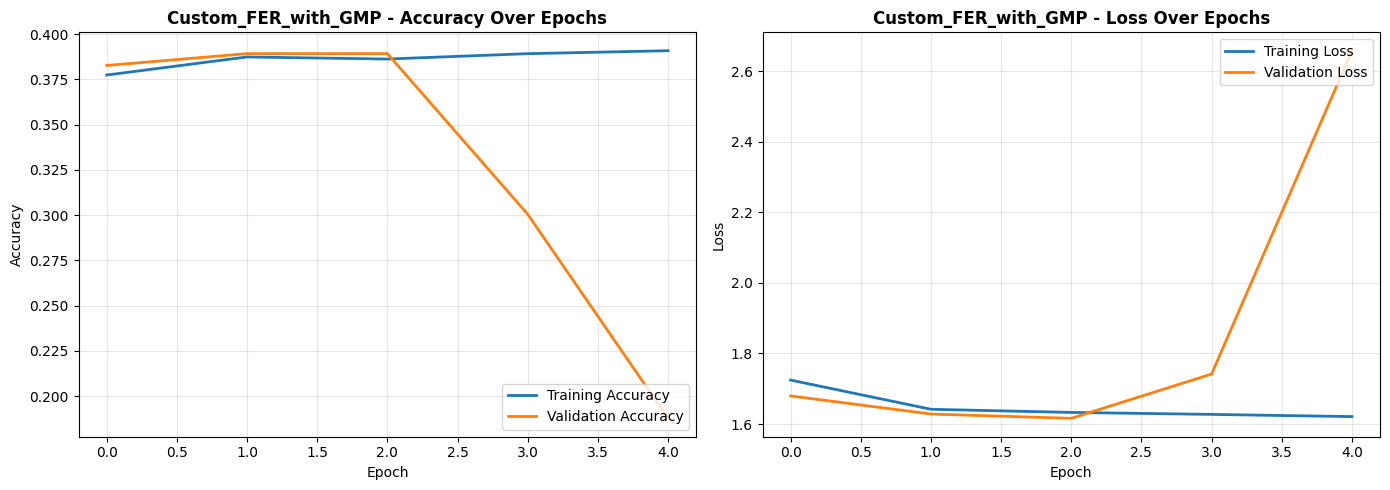

In [16]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title(f'{model_name} - Accuracy Over Epochs', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title(f'{model_name} - Loss Over Epochs', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'training_history_{model_name}.png', dpi=150, bbox_inches='tight')
plt.show()

In [17]:
# Load best model and evaluate
model = keras.models.load_model(f'best_{model_name}.keras')

print("=" * 60)
print("MODEL EVALUATION ON TEST SET")
print("=" * 60)

test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_onehot, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

MODEL EVALUATION ON TEST SET

Test Loss: 1.6236
Test Accuracy: 0.3862


In [18]:
# Get predictions
y_pred_proba = model.predict(X_test_normalized, verbose=0)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Classification report
emotion_names = [EMOTION_LABELS[i+1] for i in range(7)]

print("\n" + "=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_true_classes, y_pred_classes, target_names=emotion_names))


CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Surprise       0.00      0.00      0.00       329
        Fear       0.00      0.00      0.00        74
     Disgust       0.00      0.00      0.00       160
   Happiness       0.39      1.00      0.56      1185
     Sadness       0.00      0.00      0.00       478
       Anger       0.00      0.00      0.00       162
     Neutral       0.00      0.00      0.00       680

    accuracy                           0.39      3068
   macro avg       0.06      0.14      0.08      3068
weighted avg       0.15      0.39      0.22      3068



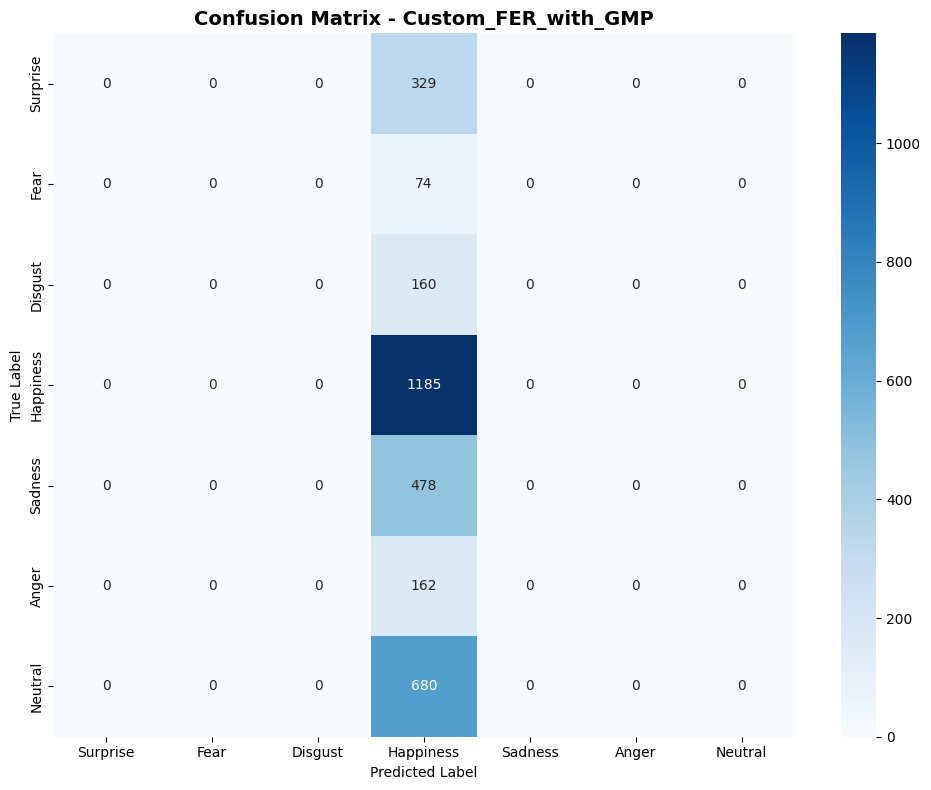

In [19]:
# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=emotion_names, yticklabels=emotion_names)
plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig(f'confusion_matrix_{model_name}.png', dpi=150, bbox_inches='tight')
plt.show()

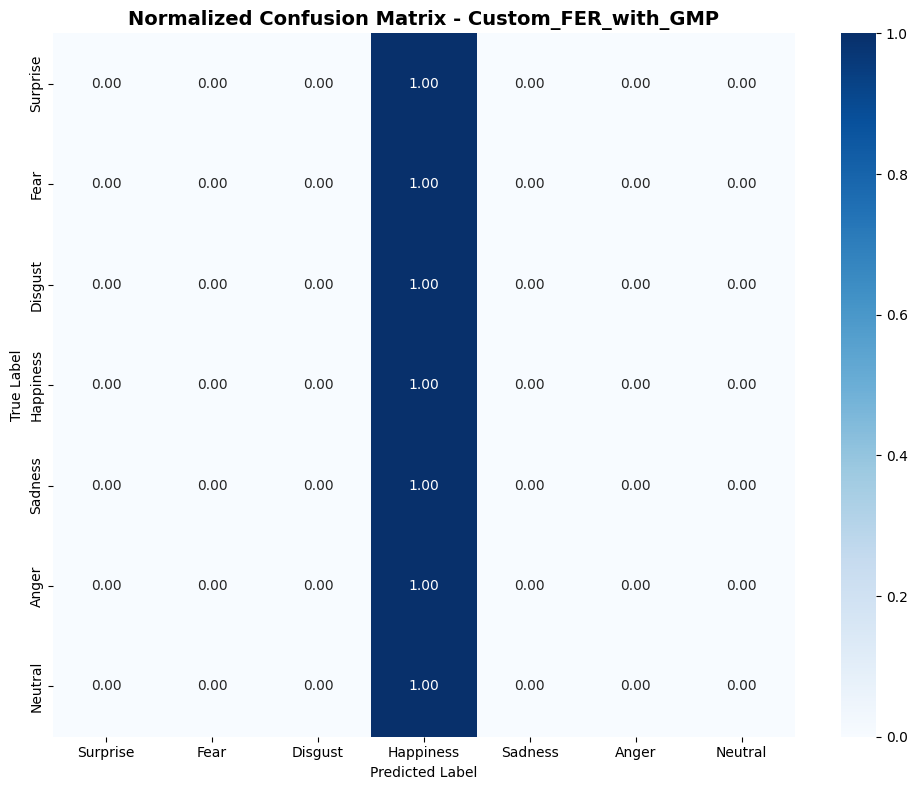

In [20]:
# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=emotion_names, yticklabels=emotion_names)
plt.title(f'Normalized Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig(f'confusion_matrix_normalized_{model_name}.png', dpi=150, bbox_inches='tight')
plt.show()

In [21]:
# Per-class accuracy
print("\n" + "=" * 60)
print("PER-CLASS ACCURACY")
print("=" * 60)
for i, emotion in enumerate(emotion_names):
    class_accuracy = cm[i, i] / cm[i, :].sum()
    print(f"{emotion}: {class_accuracy:.4f} ({cm[i, i]}/{cm[i, :].sum()})")


PER-CLASS ACCURACY
Surprise: 0.0000 (0/329)
Fear: 0.0000 (0/74)
Disgust: 0.0000 (0/160)
Happiness: 1.0000 (1185/1185)
Sadness: 0.0000 (0/478)
Anger: 0.0000 (0/162)
Neutral: 0.0000 (0/680)


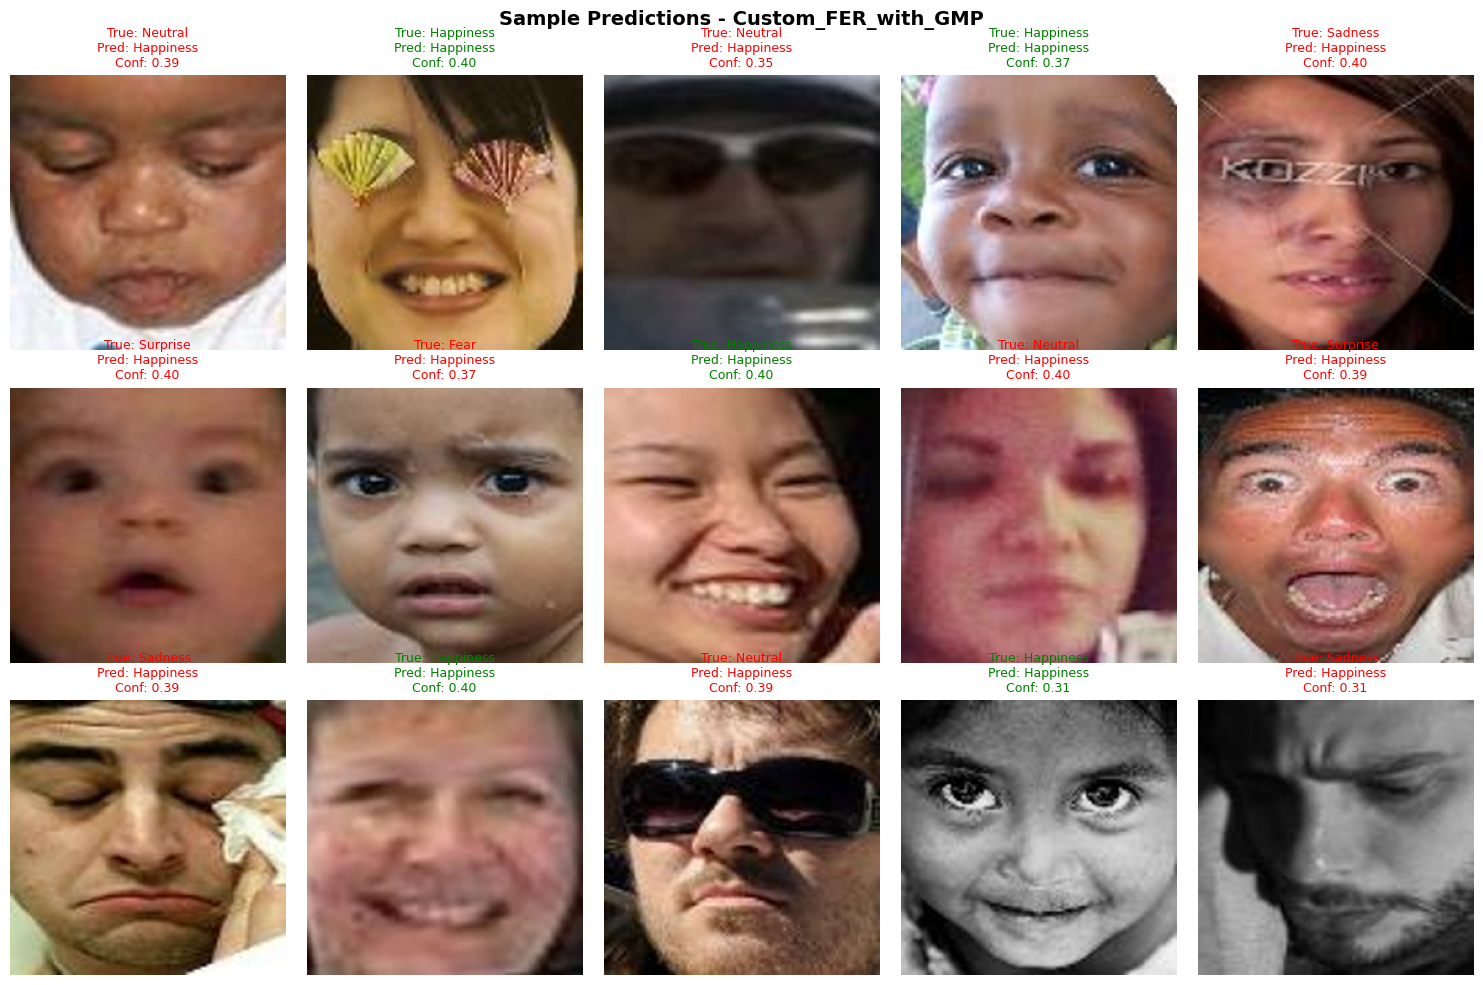

In [23]:
# Visualize sample predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle(f'Sample Predictions - {model_name}', fontsize=14, fontweight='bold')

np.random.seed(42)
sample_indices = np.random.choice(len(X_test_normalized), 15, replace=False)

for idx, ax in enumerate(axes.flatten()):
    sample_idx = sample_indices[idx]
    
    # Use X_test_normalized (values 0-1, need to display properly)
    ax.imshow(X_test_normalized[sample_idx])
    
    true_label = emotion_names[y_true_classes[sample_idx]]
    pred_label = emotion_names[y_pred_classes[sample_idx]]
    confidence = y_pred_proba[sample_idx][y_pred_classes[sample_idx]]
    
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}', 
                 fontsize=9, color=color)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'sample_predictions_{model_name}.png', dpi=150, bbox_inches='tight')
plt.show()

In [24]:
# Save final model
model.save(f'{model_name}_final.keras')
print(f"\nFinal model saved as '{model_name}_final.keras'")


Final model saved as 'Custom_FER_with_GMP_final.keras'


## Final Summary and Performance Analysis

### Về kích thước được ghi SAI trong hình gốc:

1. **56×56×24 sau MaxPool1**: SAI - Đúng phải là **56×56×32** (MaxPool không thay đổi số channels)
2. **14×14×112 sau MaxPool2**: SAI - Đúng phải là **7×7×112** (14÷2=7)
3. **Dense 3, 10**: SAI cho bài toán FER - Đúng phải là **7** (7 emotion classes)

### Về Dual Skip Connections:

Kiến trúc này sử dụng 2 skip connections xuất phát cùng một điểm (sau MaxPool1) nhưng merge ở 2 vị trí khác nhau:

1. **Skip 1 (ngắn)**: Merge sau 2 lớp Conv 5×5 → Bảo tồn features cấp thấp
2. **Skip 2 (dài - component b)**: Merge sau 4 lớp Conv → Cho phép gradient flow xa hơn

Lợi ích:
- Cải thiện gradient flow
- Multi-scale feature fusion
- Tăng khả năng học complex patterns

### Đề xuất cải tiến với Global Max Pooling:

GMP giúp:
- Giảm đáng kể số parameters
- Tăng khả năng generalization
- Chống overfitting hiệu quả hơn

### Các metric đánh giá đã sử dụng:

1. **Accuracy**: Tỷ lệ dự đoán đúng tổng thể
2. **Precision**: Độ chính xác của positive predictions
3. **Recall**: Khả năng phát hiện positive samples
4. **F1-Score**: Trung bình điều hòa của Precision và Recall
5. **Confusion Matrix**: Ma trận hiển thị chi tiết dự đoán đúng/sai cho từng class

In [25]:
# Final summary statistics
print("\n" + "=" * 60)
print("FINAL SUMMARY - PART 3.2 & 3.3")
print("=" * 60)
print(f"\nModel: {model_name}")
print(f"Total Parameters: {model.count_params():,}")

print(f"\nTest Performance:")
print(f"  - Accuracy: {test_accuracy:.4f}")
print(f"  - Loss: {test_loss:.4f}")

print(f"\nKey Architecture Features:")
print(f"  - Dual Skip Connections")
print(f"  - BatchNormalization after each Conv layer")
print(f"  - Global Max Pooling: {'Yes' if USE_GMP else 'No'}")
print(f"  - Dropout for regularization")
print(f"  - Data Augmentation during training")

print("\n" + "=" * 60)
print("END OF PART 3.2 & 3.3")
print("=" * 60)


FINAL SUMMARY - PART 3.2 & 3.3

Model: Custom_FER_with_GMP
Total Parameters: 492,871

Test Performance:
  - Accuracy: 0.3862
  - Loss: 1.6236

Key Architecture Features:
  - Dual Skip Connections
  - BatchNormalization after each Conv layer
  - Global Max Pooling: Yes
  - Dropout for regularization
  - Data Augmentation during training

END OF PART 3.2 & 3.3
